<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Case_Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case

O Ministério da Educação solicitou a você uma previsão do percentual de alunos que serão aprovador no ano de 2017, tendo como base o ano de 2016.

Crie um modelo que consiga prever o valor de aprovação em 2017 com as aprovações de 2015. Faça todo o tratamento de dados necessários para o uso da regressão linear e tire o resíduo para saber em quanto o modelo está errando.

1. Importando bibliotecas para análise

Conceitos:

- **Pandas** é usado para manipulação e análise de dados.

- **NumPy** oferece suporte a arrays e matrizes multidimensionais, junto com uma coleção de funções matemáticas.

- **Seaborn** e **Matplotlib** são para visualização de dados.

- **statsmodels** é usado para construir modelos estatísticos, realizar testes estatísticos e exploração de dados.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

2. Carregando o dataframe

In [7]:
df = pd.read_excel('/content/provacao_alunos.xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


3. Levantando as Estatísticas Descritivas

In [9]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


4. Preparação dos Dados

Conceitos:

- **Variável Independente**: Aqui, ano_2015, é a variável que você acha que influenciará outra variável.

- **Variável Dependente**: ano_2016, é a variável que você quer prever.

In [10]:
# Supondo que 'Aprovacoes_2015' e 'Aprovacoes_2016' sejam suas colunas de interesse
X = df['ano_2015']  # Variável independente
y = df['ano_2016']  # Variável dependente

# Adicionando uma constante ao modelo, importante para a regressão linear
X = sm.add_constant(X)


5. Construção do Modelo de Regressão Linear

Conceitos:

- **OLS** (Ordinary Least Squares) é um método que minimiza a soma dos quadrados das diferenças entre o observado e o previsto.

- O resumo fornece **R²** (explica a variação da variável dependente), coeficientes (influência das variáveis independentes) e p-valores (significância das variáveis).

In [14]:
# Construindo o modelo
modelo = sm.OLS(y, X).fit()

# Adiciona a coluna de previsões ao DataFrame
df['Previsao_2016'] = modelo.predict(X)

# Adiciona a coluna de resíduos ao DataFrame
df['Residuos'] = modelo.resid

# Resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           3.02e-10
Time:                        23:02:06   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [16]:
# Mostra o novo DataFrame com as previsões e os resíduos
df.head()

,UF,ano_2015,ano_2016,Previsao_2016,Residuos
0,Rondonia,77,85,78.159571,6.840429
1,Acre,79,81,79.895812,1.104188
2,Amazonas,83,85,83.368294,1.631706
3,Roraima,81,82,81.632053,0.367947
4,Para,73,76,74.687089,1.312911


6. Análise de Resíduos

Conceitos:

- **Resíduos** são as diferenças entre os valores observados (reais) e os valores previstos pelo modelo. Idealmente, eles devem estar distribuídos aleatoriamente em torno do eixo zero, indicando que o modelo está fazendo previsões precisas sem viés sistemático.


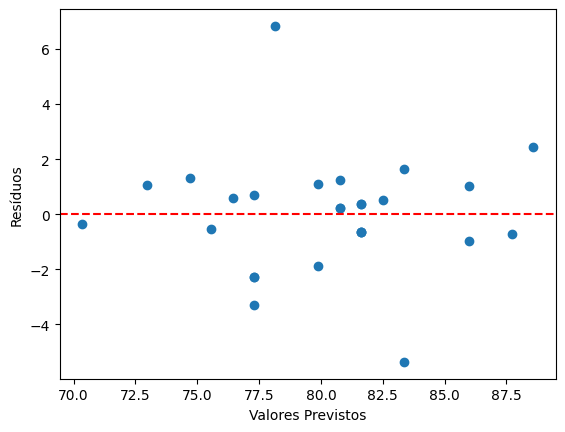

In [12]:
# Calculando resíduos
residuos = modelo.resid

# Plotando os resíduos
plt.scatter(modelo.predict(), residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()